In [52]:
import numpy as np
import pandas as pd
import argparse
import cv2
from sklearn.metrics.pairwise import cosine_similarity
from PIL import Image, ImageOps
import numpy as np
import statistics
import os

In [53]:
ap = argparse.ArgumentParser()

In [54]:
img_path = "C:\\Users\\arvra\\Documents\\UVa files\\Research Assistantship\\Final data Analysis\\20158.jpg"

In [55]:
color_pixel_names = ['White','Grey','Black','Red','Yellow','Blue','Green','Purple','Brown','Orange','Pink']

color_pixel_values = [[255,255,255],[128,128,128],[0,0,0],[255,0,0],[255,255,0],
                      [0,0,255],[0,255,0],[127,0,255],[153,76,0],[255,153,51],
                     [255,102,178]] 

In [56]:
len(color_pixel_names)

11

### Reading the image

In [266]:
images_folder = 'C:\\Users\\arvra\\Documents\\UVa files\\Research Assistantship\\New sample data\\Final Images\\'

In [267]:
alldata = pd.read_excel("AllData.xlsx")

In [268]:
each_image.split(".")[0]

'99845'

In [ ]:
alldata[alldata.Index.values == each_image.split(".")[0]]

In [16]:
all_images = os.listdir(images_folder)

In [17]:
color_result_all = []

for each_image in all_images:
    print(each_image)
    im = Image.open(images_folder+'\\'+ each_image)
    im = im.convert('RGB')
    im = im.crop((5,5,im.size[0]-5,im.size[1]-5))
    
    pixels = list(im.getdata())
    width, height = im.size
    
    


    border_pixels = np.array([im.getpixel((0,0)),im.getpixel((im.size[0]-1,0)),\
                      im.getpixel((0,im.size[1]-1)),im.getpixel((im.size[0]-1,im.size[1]-1))])

    color_results = [np.argmin([np.linalg.norm(border_pixels_each - np.array(each)) for each in color_pixel_values]) for 
                          border_pixels_each in border_pixels]

    color_result_all.extend([statistics.mode(color_results)])
    
    print(statistics.mode(color_results))

100063.jpg
0
100068.jpg
1
100095.jpg
10
100185.jpg
1
100191.jpg
0
100343.gif
1
100353.gif
0
100445.jpg
2
100554.jpg
0
100574.gif
1
10061.jpg
1
100691.jpg
2
100738.jpg
1
100877.gif
0
100903.gif
2
100978.jpg
8
101230.gif
0
101293.gif
1
101314.gif
1
101365.gif
1
101400.jpg
4
101427.gif
2
101514.jpg
1
101581.jpg
0
101600.jpg
4
101659.jpg
6
101664.jpg
2
101689.gif
2
101714.jpg
1
101738.jpg
0
101751.jpg
4
101754.jpg
9
101760.jpg
0
10180.gif
1
101852.jpg
2
101882.jpg
1
101901.jpg
1
101914.jpg
1
101947.jpg
5
101967.gif
2
102007.png
0
102017.png
1
10210.gif
2
102114.gif
10
102124.gif
0
102137.gif
2
102173.gif
2
102233.jpg
0
102375.jpg
2
102427.jpg
2
102438.jpg
2
102464.gif
2
102480.jpg
0
102539.jpg
8
102589.gif
0
102629.gif
2
102757.jpg
2
102778.gif
1
102799.jpg
0
102812.jpg
1
102827.gif
8
102861.gif
0
102905.gif
1
102953.gif
1
102954.jpg
2
102975.gif
1
103036.gif
2
103055.gif
1
10307.jpg
0
103126.jpg
0
103148.jpg


StatisticsError: no unique mode; found 2 equally common values

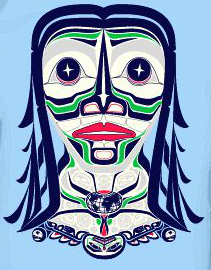

In [173]:
for each in 

In [175]:
border_pixels

array([[148, 194, 228],
       [165, 213, 249],
       [161, 209, 245],
       [129, 175, 209]])

In [165]:
border_pixels = np.array([im.getpixel((0,0)),im.getpixel((im.size[0]-1,0)),\
                      im.getpixel((0,im.size[1]-1)),im.getpixel((im.size[0]-1,im.size[1]-1))])

border_pixels

array([[181, 195, 169],
       [181, 195, 169],
       [181, 195, 169],
       [153, 102,   0]])

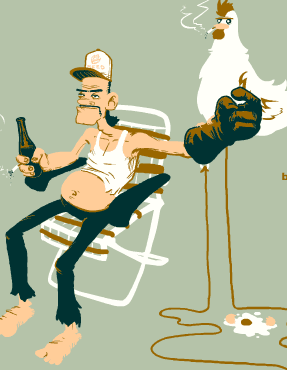

In [166]:
im

## Using Machine Learning approach on the RGB color

In [269]:
color_result_all = []
border_pixels_all = pd.DataFrame()
problem_count = 0

for each_image in all_images:
    print(each_image)
    
    try:
        im = Image.open(images_folder+'\\'+ each_image)
        im = im.convert('RGB')
        im = im.crop((5,5,im.size[0]-5,im.size[1]-5))
    except: 
        problem_count += 1
        continue
    
    pixels = list(im.getdata())
    width, height = im.size
    
    border_pixels = np.array([im.getpixel((0,0)),im.getpixel((im.size[0]-1,0)),\
                      im.getpixel((0,im.size[1]-1)),im.getpixel((im.size[0]-1,im.size[1]-1))])

    
    df_temp = pd.DataFrame(pd.DataFrame(border_pixels).melt().value).T
    df_temp['Image_id'] = each_image.split(".")[0]
    
    
    border_pixels_all = pd.concat([border_pixels_all,df_temp], axis = 0)

100063.jpg
100068.jpg
100095.jpg
100185.jpg
100191.jpg
100343.gif
100353.gif
100445.jpg
100554.jpg
100574.gif
10061.jpg
100691.jpg
100738.jpg
100877.gif
100903.gif
100978.jpg
101230.gif
101293.gif
101314.gif
101365.gif
101400.jpg
101427.gif
101514.jpg
101581.jpg
101600.jpg
101659.jpg
101664.jpg
101689.gif
101714.jpg
101738.jpg
101751.jpg
101754.jpg
101760.jpg
10180.gif
101852.jpg
101882.jpg
101901.jpg
101914.jpg
101947.jpg
101967.gif
102007.png
102017.png
10210.gif
102114.gif
102124.gif
102137.gif
102173.gif
102233.jpg
102375.jpg
102427.jpg
102438.jpg
102464.gif
102480.jpg
102539.jpg
102589.gif
102629.gif
102757.jpg
102778.gif
102799.jpg
102812.jpg
102827.gif
102861.gif
102905.gif
102953.gif
102954.jpg
102975.gif
103036.gif
103055.gif
10307.jpg
103126.jpg
103148.jpg
103151.png
103189.jpg
103258.gif
103279.jpg
103430.gif
103446.gif
103504.gif
103543.png
103556.jpg
103639.jpg
103651.jpg
103657.jpg
103692.jpg
103702.jpg
103779.jpg
103800.gif
103826.gif
103852_2.jpg
103857-1.jpg
103942.gif

129604.jpg
129698.jpg
129736.jpg
129750.gif
129755_1.gif
129755_2.gif
129796.jpg
129829.jpg
129903.jpg
130000.jpg
130006.jpg
130038.jpg
130065.jpg
130083.gif
130132.jpg
130138.jpg
13020.png
130206_2.jpg
130229.jpg
130245.gif
130252.jpg
130339.jpg
130360.jpg
130398.jpg
13040.jpg
130432.gif
130434.jpg
130448.jpg
130455.gif
130506.jpg
130529.jpg
130530.jpg
130635.gif
130647.jpg
130686.jpg
130705.jpg
130805.gif
130873.gif
13098.png
131039.jpg
131055.jpg
131078.jpg
131085.gif
131097.png
131113.jpg
131132.jpg
131140.jpg
131173.jpg
131189.gif
131242.jpg
131359.jpg
131370.gif
131403.gif
131405.jpg
131447.jpg
131450.jpg
131483.jpg
131506.jpg
131634.gif
131650.jpg
131694.jpg
131699.gif
131725.gif
13173.png
131859.gif
131893.jpg
131908.gif
131930.jpg
131934.jpg
131983.jpg
131995.jpg
132021.gif
132044.jpg
132146.jpg
132201.gif
132210.jpg
132269.jpg
132274.jpg
132313.jpg
132359.png
132362.png
132455.gif
13246.png
1325.jpg
132514.gif
132524.jpg
13253.jpg
132567.jpg
132596.jpg
132639_1.gif
132647.png

153899.png
153960.jpg
153971.jpg
153988_1.jpg
154089.jpg
15413.jpg
15415.jpg
154244.jpg
154286.jpg
154320.jpg
154335.gif
154340.jpg
154409.png
154432.jpg
154507.jpg
15458_2.jpg
154680.gif
154719.jpg
154750.jpg
154784.gif
154785.jpg
154793.gif
154977.jpg
155101.jpg
155103.jpg
155209.jpg
155325.jpg
155328.jpg
155360.jpg
155376.jpg
15538.jpg
155420.png
155421_2.jpg
155442.jpg
15546.png
155524.jpg
15568.jpg
155695.jpg
155733.jpg
155755.jpg
15585.jpg
155890_2.jpg
155891.png
155931.gif
155938.jpg
155939.jpg
155982.gif
15601.jpg
156077.gif
156093.jpg
15616.jpg
156185.jpg
156208.jpg
15624.png
156291.gif
156316.jpg
156319.jpg
156350.png
156376.jpg
156386.jpg
156404.jpg
15647_2.jpg
156489.jpg
156498.gif
15651.gif
156538.jpg
156566.jpg
156590.jpg
15663.jpg
156632.jpg
156659.jpg
156676.jpg
156700.jpg
156702.jpg
156724.gif
156750.gif
156831.jpg
156842.jpg
156857.jpg
156888.jpg
156910.jpg
157002.jpg
157006.jpg
157013.jpg
157020.png
157026.jpg
157038.jpg
157061.gif
157183_2.gif
157256.jpg
157285.jpg


180564.jpg
180571.gif
180573.jpg
180574.jpg
180585.jpg
180611.gif
180612.jpg
180616.png
180630.jpg
180654.jpg
180666.jpg
180684.jpg
180709.jpg
180711.jpg
180756.jpg
180758.jpg
180760.jpg
180787.jpg
180827.jpg
180839.jpg
180893.png
180972.png
180997.jpg
181034.jpg
181043.jpg
181050.jpg
181071.gif
18109.jpg
18112.jpg
181135.jpg
181210.jpg
181228.jpg
18126.jpg
181265.gif
181273.gif
181281.jpg
181288_1.jpg
181288_2.jpg
181329.jpg
181334.jpg
181423.gif
181449.gif
181475.jpg
181479.png
181508.gif
181526.jpg
181540.jpg
181563.jpg
181586.jpg
181642.gif
181679.jpg
181692.jpg
18170.png
181746.jpg
181747.jpg
181806.jpg
181816.jpg
181861.jpg
181891.gif
181919.gif
181947.jpg
181970.jpg
181987.jpg
182001.jpg
182003.jpg
182107.jpg
182151.jpg
18216.jpg
18218.jpg
18220.jpg
182241.jpg
182272_1.png
182316.jpg
182339.jpg
182365.gif
182367.png
182471.jpg
182487.png
182578.jpg
182580.png
182595.jpg
182638.jpg
182683.jpg
182715.png
18272.jpg
182763.jpg
182807.jpg
182836_1.jpg
18288.jpg
182908_1.jpg
182986.gi

199516.jpg
199532.jpg
19963.jpg
199641.jpg
199660.jpg
199748.jpg
199806.jpg
199841.jpg
199865.jpg
199901.jpg
199914.jpg
199944.jpg
199945.jpg
199954.jpg
199970.jpg
199993.jpg
199997.jpg
199997_1.jpg
200019.png
200032.jpg
200035.gif
200093.png
200106.jpg
20011.jpg
200112.jpg
200181.jpg
200187.jpg
200198.jpg
200264.jpg
200280.png
200288.jpg
200305.jpg
20031.jpg
200316.jpg
200327.jpg
200381.jpg
20041.jpg
200426.jpg
200434.jpg
200443_1.jpg
200443_2.jpg
200444.jpg
200446.jpg
20046.jpg
200471.jpg
200507.jpg
200514.jpg
200532.jpg
200542.jpg
200559.png
200562.jpg
200588.jpg
20063.gif
200715.jpg
200718.png
200720.jpg
200750.jpg
200783.jpg
200788.jpg
200789.jpg
200796.png
200816.jpg
200846.jpg
200858.jpg
20087.jpg
200891_1.jpg
200932.jpg
200947_1.jpg
200979.jpg
200983.jpg
201087.jpg
201096.jpg
201105.jpg
201131.jpg
20114.jpg
201223.jpg
201253.jpg
20135.jpg
201357.jpg
201373.jpg
201384.jpg
201391.jpg
201405.jpg
20143.jpg
201431.jpg
201440.jpg
201468.jpg
201532.jpg
201541.jpg
201548.jpg
201565.jpg

214968.jpg
214974.jpg
214981.jpg
214982.jpg
214996.jpg
215030.jpg
215054.jpg
215123.jpg
215131.jpg
215139.jpg
215143.jpg
215155.jpg
215161.gif
215242.jpg
215262.jpg
215263.jpg
215276.jpg
215280.jpg
215285.jpg
215295.jpg
215345.gif
215391.jpg
215406.jpg
215431.jpg
215440-1.jpg
215441.jpg
215482.jpg
215490_1.jpg
215494.jpg
2155.jpg
215558.jpg
215567.jpg
215584_2.jpg
215607-1.png
215679.jpg
215687.jpg
21569.gif
215694.png
215720.jpg
215740.jpg
21579.png
215794.png
215813.jpg
215888.jpg
215901.gif
215926.gif
215959.jpg
215973.jpg
215993.jpg
216015.jpg
216039.jpg
216097.jpg
216124.jpg
216132.jpg
216184.jpg
216210.jpg
216243.jpg
216264.jpg
216270.jpg
216278.gif
216289.jpg
216330.jpg
216344.gif
216345.gif
216383.gif
216438.jpg
216445.jpg
216465.jpg
216559.jpg
216565-1.gif
216570.gif
216633.jpg
216773.jpg
216795.jpg
216805.gif
216830.jpg
216911-1.jpg
216930.jpg
216958.jpg
216964_1.jpg
216964_2.jpg
216974.jpg
216991.jpg
217001.jpg
217050.jpg
217053.jpg
217061.jpg
217069.jpg
217170.jpg
217171.jp

235016.gif
235054.jpg
235106.png
235144.gif
235173.jpg
235191.jpg
235203.jpg
235232.jpg
235234.jpg
235237.jpg
235243.jpg
235258.gif
235259.jpg
235260.jpg
235267.jpg
235272.jpg
235280.jpg
235284.jpg
23530.gif
235348.jpg
23538.gif
235468.jpg
235507.jpg
23557.jpg
235589.jpg
23559.jpg
235616.jpg
235675.jpg
235697.jpg
2357.jpg
235738.jpg
235767.jpg
235812.gif
235833.gif
235852.jpg
235893.jpg
235894.jpg
23591.gif
235926.jpg
235938.jpg
235981.jpg
236065.jpg
236088.jpg
236090.jpg
2360_1.gif
236112.jpg
236115.jpg
236128.jpg
236131.gif
236206.jpg
236221.jpg
236234.jpg
236247.jpg
236318.jpg
236319.gif
236340.jpg
23637.jpg
236388.jpg
236391.jpg
2364.gif
236403.jpg
236409.gif
236410.jpg
236417.jpg
236456.jpg
236483.jpg
236492.jpg
236540.jpg
236547.gif
236555.gif
236634.jpg
236696.jpg
23670.gif
236707.jpg
23672.png
236767.jpg
236776.jpg
236799.jpg
236816.jpg
236833.jpg
236844.jpg
236893.jpg
236900.gif
236938.jpg
236946.jpg
237027.jpg
237074.jpg
237095.jpg
237102.jpg
237135.jpg
237142.gif
237161.jpg


252897.jpg
252924.gif
252947.jpg
252956.jpg
253070.jpg
253109.jpg
253121.jpg
253167.jpg
253210.jpg
253252.jpg
253267.gif
253295.jpg
253305.jpg
253312.jpg
253403.jpg
253427.jpg
253428.gif
253433.jpg
253476.jpg
253493.jpg
253496.jpg
2535.gif
253563.jpg
253606.jpg
253615.jpg
253642.jpg
253651.jpg
253661.jpg
253743.gif
253766.jpg
253794.gif
253798.jpg
2538.png
253804.jpg
253829.jpg
253873.jpg
253878.jpg
253885.jpg
253887.jpg
253908.jpg
253917.jpg
253933.jpg
253953.jpg
254031.jpg
254069.jpg
254101.jpg
25417.gif
254197.jpg
254206.jpg
25422.gif
254228.jpg
254242.jpg
254325.jpg
254353.jpg
254369.jpg
254374.jpg
254421.jpg
254437.jpg
254442.jpg
254460.jpg
254471.jpg
254479.jpg
254491.jpg
254556.jpg
254591_1.jpg
254607_2.jpg
254648.jpg
254687.jpg
254699.jpg
254701.jpg
254720.jpg
254725.jpg
254794.jpg
254795.gif
254810.jpg
254815.jpg
254816.jpg
254817.jpg
254866.jpg
254878.jpg
254884.jpg
254892.jpg
254920.jpg
254926.jpg
254934.jpg
254945.jpg
254948.jpg
255003.jpg
255015.jpg
255019.jpg
255036.jpg
2

269924.jpg
269943.jpg
269958.jpg
269968.jpg
269978.jpg
269988.jpg
270005.jpg
27001.jpg
270011.jpg
270027.jpg
27004.gif
270040.jpg
270051.jpg
270086.jpg
270123.jpg
270159.jpg
270173.jpg
2702.jpg
270205.jpg
270216.jpg
270239.jpg
270244.jpg
270313.jpg
270314.jpg
270319.jpg
270328.jpg
270425.jpg
270476.jpg
270491.jpg
270542.jpg
270567.jpg
270574.jpg
270578.jpg
270600.jpg
27062.gif
270631.jpg
270644.jpg
270653.jpg
270657.jpg
270722.jpg
270736.jpg
270759.jpg
27076.jpg
270766.jpg
270819.jpg
270823.jpg
270830.jpg
270865.jpg
27089.png
270937.jpg
270960.jpg
270969.jpg
270975.jpg
270979.jpg
27098.png
270999.jpg
271015.jpg
271026.jpg
271056.jpg
271080.jpg
271085.jpg
271086.jpg
271094.jpg
271110.jpg
271162.jpg
271250.gif
271298.jpg
271315.jpg
271325.jpg
271339.jpg
271342.jpg
271360.jpg
271365.jpg
271377.jpg
271402.jpg
271403.jpg
271522.jpg
271582.jpg
271591.jpg
271628.jpg
271636.jpg
27166.gif
271732.jpg
271771.jpg
271831.jpg
27184.jpg
271843.jpg
271854.jpg
271876.jpg
271877.jpg
271925.jpg
271938.jp

289761.jpg
289768.jpg
289800.jpg
289877.jpg
289941.png
289993.png
290024.jpg
290030.png
290033.jpg
290056.png
290067.png
290081.jpg
290117.jpg
290187.jpg
290199.jpg
290218.jpg
290252.jpg
290360.jpg
290383.jpg
290393.jpg
29041.gif
290434.jpg
290462.png
290464.jpg
290469.jpg
290498.jpg
290528.jpg
290575.png
290585.jpg
29060.jpg
290632.jpg
29064.gif
290765.jpg
29078.jpg
290819.jpg
290848.jpg
290849.jpg
290857.jpg
29087.gif
290894.jpg
290916.jpg
290919.jpg
290929.jpg
29096.gif
290961.png
290989.jpg
291029.png
291068.jpg
291108.jpg
291128.jpg
291172.png
291201.jpg
291226.jpg
291229.jpg
29128.jpg
291390.jpg
291397.jpg
29140.jpg
291407.png
291441.jpg
291483.png
291549.jpg
291555.jpg
291563.jpg
291574.jpg
2916.png
291645.jpg
291651.jpg
291727.jpg
291752.jpg
291771.jpg
291777.jpg
291842.jpg
291887.jpg
291909.jpg
29193.jpg
291932.jpg
29195.gif
292009.jpg
292044.jpg
292101.jpg
292168.jpg
292234.jpg
292351.jpg
292381.jpg
292398.jpg
292441.jpg
292485.jpg
292487.jpg
292497.jpg
292508.jpg
292562.jpg


31042.jpg
310467.jpg
310496.jpg
310514.jpg
310533.jpg
310550.jpg
310590.jpg
310637.png
310680.jpg
310688.png
310721.png
310733.png
310758.jpg
310784.png
310809.png
310816.png
31085.jpg
31087.jpg
310878.png
310893.jpg
31094.jpg
310959.jpg
310991.png
311059.jpg
311066.png
311097.jpg
311101.jpg
311113.png
311131.jpg
311143.jpg
311155.jpg
311172.jpg
311176.png
311195.png
311284.jpg
311299.png
311312.png
311314.jpg
311341.jpg
311358.png
311359.jpg
311463.png
31147.png
311503.jpg
311505.png
311537.jpg
31157.gif
311571.jpg
311576.jpg
311581.png
311610.png
311663.jpg
31168.gif
311688.png
311691.jpg
311699.png
311740.JPG
31177.png
311793.jpg
311801.png
311819.jpg
311838.png
311879.jpg
31194.png
311950.png
31200.png
312002.png
312011.jpg
312021.png
312028.png
312030.jpg
312051.png
312056.jpg
31209.jpg
312095.jpg
312105.jpg
312112.jpg
31225.gif
31228.gif
31230.png
312320.png
312321.png
312330.png
312344.jpg
312361.png
312389.jpg
31242.png
312473.jpg
3125.png
312502.png
312509.png
312523.png
31259

39080.jpg
39083.jpg
39093.jpg
39126.gif
39153.jpg
39191.gif
39202.jpg
39222.gif
39240.jpg
39242.jpg
39306.jpg
39332.gif
39340.png
39356.png
39395.png
3940.png
39470.jpg
39478.jpg
39497.jpg
39520.png
39526.png
39573.jpg
3960.jpg
39613.png
3965.png
39690.jpg
39723.jpg
39781.jpg
39948.jpg
39950.jpg
39971.jpg
39981.gif
39997.jpg
40.jpg
40039.jpg
40051.jpg
40090.jpg
40119.jpg
4013.jpg
40164.jpg
40193.jpg
40237.jpg
40281.jpg
40299.jpg
40313.jpg
4035.png
40393.jpg
40394.jpg
40403.jpg
40443.png
40455.gif
40480.png
40508.jpg
40518.png
40534.png
40557_1.gif
40561.png
40611.gif
40686.jpg
40697.jpg
40768.png
4081.png
4088.gif
40897.jpg
40920.gif
40923.gif
40936.jpg
40939.gif
40973.jpg
41080.gif
41085.png
41107.png
41109.gif
41114.gif
41169.jpg
41250.gif
41363.jpg
41386.jpg
41407.png
41448.png
41467.png
41486.png
41496.png
41515.jpg
41520.jpg
41535.png
41543.jpg
41552.jpg
41576.jpg
41641.gif
41663.jpg
41722.png
41733.jpg
41769.png
4178.png
41832.png
4187.jpg
41886.png
41944.jpg
41964.png
4200.jpg
4

65564.jpg
65603.gif
65656.jpg
65865.jpg
65874.jpg
65933.JPG
65979.jpg
6598.jpg
66054.jpg
66057.jpg
66121.gif
66122.jpg
66174.JPG
66202.jpg
66206.jpg
66237.jpg
66333.gif
66343.jpg
66351.jpg
6636.gif
66380.jpg
66404.jpg
66431.jpg
66475.jpg
66501.jpg
66507.gif
66573.jpg
66579.jpg
6661.jpg
66677.jpg
66716.jpg
66749.jpg
66762.jpg
6677.png
66778.jpg
66804.jpg
6682.jpg
66822.jpg
66826.jpg
66836.jpg
66865.gif
66912.jpg
66913.jpg
66914.gif
66941.gif
67009.JPG
67011.jpg
67073.jpg
67078.jpg
67111.gif
67125.gif
67168.gif
67172.gif
67191.JPG
67242.gif
67249.gif
6727.jpg
67313.gif
67337.gif
67373.jpg
67449.gif
67503.gif
67558.jpg
6762.jpg
67700.jpg
67779.jpg
67786.jpg
67791.jpg
67800.JPG
67852_1.jpg
67857.jpg
67934.jpg
67969.gif
67976.jpg
68005.gif
68006.gif
68055.gif
68100.JPG
68241.gif
68270.jpg
68272.gif
68310.jpg
68378.jpg
68384.jpg
6839.jpg
68448.jpg
68473.jpg
6856.gif
68615.gif
68643.jpg
68677.JPG
68711.gif
68764.gif
6885.png
6896.jpg
69087_2.gif
69124.jpg
69145.jpg
6917.png
69198.jpg
69259.gi

98716_1.gif
98769.png
98788.gif
98792.png
98810.gif
98838.gif
98892.jpg
98932.gif
98946.gif
99147.jpg
99189.gif
99251.gif
99268.gif
99288.jpg
99502.jpg
99516.gif
99570.gif
99575.gif
99602.gif
99666.jpg
99712.gif
99744.jpg
99805.png
99845.gif


In [270]:
border_pixels_all.shape

(7216, 13)

In [271]:
border_pixels_all.loc[:,'R_new'] = border_pixels_all.iloc[:,0:4].apply(np.median,axis = 1)
border_pixels_all.loc[:,'G_new'] = border_pixels_all.iloc[:,4:8].apply(np.median,axis = 1)
border_pixels_all.loc[:,'B_new'] = border_pixels_all.iloc[:,8:12].apply(np.median,axis = 1)

In [272]:
border_pixels_all.reset_index(inplace = True, drop = True)

### Reading the response file

In [273]:
background_color = pd.read_csv("Major_Background_labels.csv")

In [274]:
background_color.head()

,Image_index,Major_backgroup
0,28,1
1,40,6
2,698,1
3,769,4
4,786,6


In [275]:
pixel_background_data = pd.merge(border_pixels_all,background_color,how = 'left',left_on= ['Image_id'],right_on=['Image_index'])

In [276]:
pixel_background_final = pixel_background_data.drop(['Image_index','Image_id'],axis = 1)

In [277]:
pixel_background_final.head()

,0,1,2,3,4,5,6,7,8,9,10,11,R_new,G_new,B_new,Major_backgroup
0,255,255,51,255,255,255,43,255,204,204,0,204,255.0,255.0,204.0,5
1,124,124,124,124,167,167,167,167,176,176,176,176,124.0,167.0,176.0,6
2,204,204,153,204,170,213,170,170,204,204,153,204,204.0,170.0,204.0,8
3,0,0,0,0,128,128,85,128,102,51,51,102,0.0,128.0,76.5,7
4,255,255,255,255,255,255,255,255,255,255,255,255,255.0,255.0,255.0,1


In [278]:
from sklearn.model_selection import train_test_split

In [293]:
X_train, X_test, y_train, y_test = train_test_split(pixel_background_final.loc[:,['R_new','G_new','B_new']],
                                                    pixel_background_final['Major_backgroup'], test_size = 0.2,
                                                    random_state = 0)

### Building Machine Learning models

In [294]:
#from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

In [304]:
#lr_model = LogisticRegression(C = 10)
lr_model = RandomForestClassifier(n_estimators= 500)

In [305]:
lr_model.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [306]:
100 * (lr_model.predict(X_test) == y_test).sum()/len(y_test)

79.22437673130194

In [307]:
from sklearn.metrics import confusion_matrix

In [308]:
confusion_matrix(y_test,lr_model.predict(X_test))

array([[231,  36,   2,   0,   7,   3,   0,   1,   2,   0,   0],
       [ 16, 175,  10,   1,   0,   7,   1,   0,  10,   0,   1],
       [  2,  14, 159,   0,   0,   5,   0,   0,   1,   0,   0],
       [  3,   2,   2,  57,   3,   0,   0,   9,   2,   0,   0],
       [  8,   5,   0,   0, 101,   1,   3,   0,   6,   4,   3],
       [  7,   7,   2,   1,   0, 202,   1,   1,   3,   0,   0],
       [  1,   7,   4,   0,   3,   7,  85,   0,   5,   0,   0],
       [  2,   4,   1,   4,   0,   3,   1,  33,   1,   0,   1],
       [  5,  24,   3,   1,  11,   0,   3,   0,  95,   0,   2],
       [  0,   0,   0,   3,   2,   0,   0,   0,   0,   6,   0],
       [  0,   1,   0,   0,   8,   0,   0,   1,   0,   0,   0]],
      dtype=int64)

In [309]:
lr_model.classes_

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12], dtype=int64)

In [291]:
result = pd.DataFrame(data = {'Image_id': pixel_background_data.iloc[X_test.index.values,:].Image_id,
                              'Actual': y_test.values,'Prediction':lr_model.predict(X_test)})
result[result.Actual != result.Prediction].tail(10)

,Actual,Image_id,Prediction
6094,2,311341,9
546,2,131113,9
4123,12,250866,5
5334,2,283958,3
5585,4,293617,1
3192,2,223569_1,9
3449,9,231926,5
5001,1,272598,2
2402,7,203346,9
333,2,121424,6


In [262]:
 pixel_background_data.iloc[X_test.index.values,:]

,0,1,2,3,4,5,6,7,8,9,10,11,Image_id,R_new,G_new,B_new,Image_index,Major_backgroup
8474,254,254,254,254,209,209,209,209,203,203,203,203,44312,254.0,209.0,203.0,44312,8
8857,176,176,176,176,185,185,185,185,173,173,173,173,56583,176.0,185.0,173.0,56583,2
9687,204,204,255,255,213,255,255,255,102,102,102,102,87616,229.5,255.0,102.0,87616,5
799,1,0,0,0,1,0,0,0,1,0,0,0,131242,0.0,0.0,0.0,131242,3
9855,51,51,51,51,43,43,43,0,0,0,0,0,94575,51.0,43.0,0.0,94575,9
2633,0,0,0,0,0,0,0,0,0,0,0,0,1925,0.0,0.0,0.0,1925,6
5296,239,245,226,239,239,245,228,239,239,245,223,239,254197,239.0,239.0,239.0,254197,5
6444,74,109,74,109,73,104,73,104,68,82,68,82,280081,91.5,88.5,75.0,280081,2
5227,172,132,172,172,211,172,211,211,240,198,240,240,252454,172.0,211.0,240.0,252454,1
4155,51,53,49,43,42,42,40,36,25,24,23,18,226287,50.0,41.0,23.5,226287,6
